verify dataset EDA

In [4]:
# Printing the content of the main dataset directory
print("Listing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9:")
!ls /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9

# Printing the content of the validation directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/valid:")
!ls /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/valid

# Printing the content of the train directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/train:")
!ls /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/train

# Printing the content of the test directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/test:")
!ls /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/test

# Printing the content of the test images directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/test/images:")
!ls /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/test/images

# Printing the content of the test labels directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/test/labels:")
!ls /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/test/labels


Listing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9:
data.yaml  test  train	valid

Listing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/valid:
images	labels

Listing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/train:
images	labels

Listing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/test:
images	labels

Listing contents of /kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9/test/images:
20231129_182321_jpeg.rf.749c4199b69cf8e462d80e243d0de6bb.jpg
20231129_182509_jpeg.rf.370cf4756c29995894101151f1fd6b98.jpg
334506-svs-screenshot-1708477202947_png.rf.eae6d3be4a668e4664984fea9bea3691.jpg
334506-svs-screenshot-1708477208165_png.rf.3e7969080f064229b4124ad90e33394b.jpg
44525-svs-screenshot-1708479050324_png.rf.8fa025d394332ed7cbc5f62240c4f65b

**1. Dataset Overview**

1. Basic Dataset Structure



* The dataset is structured into three splits: train, valid, and test.

*  For each split, the script:Lists the number of images (JPEG files) in the images folder.

*  Lists the number of label files (TXT files) in the labels folder.Computes the number of images that are missing a corresponding label.




3. Label Distribution Analysis

* The report next analyzes the distribution of labels in the training set.

*  It does so by:Loading the dataset configuration file (data.yaml),

*   which contains class names.Counting the occurrence of each class in the training labels.Visualizing the class distribution using a bar chart.




4. Sample Image Visualization

* A function plot_sample_image is provided to randomly select and visualize an image from a specified folder along with its bounding boxes (if available).
  
*  For each selected image:The function reads the image and its corresponding label file.It draws bounding boxes using coordinates derived from YOLO format annotations.

  
*  The image is then displayed with class labels overlaid.



5. Corrupt Image Check

* To ensure data quality, the code includes a function to check for any corrupt images in the training set.

* The function:Iterates over each JPEG file in the specified folder.Uses the PIL library to attempt to open and verify the image.

* Prints out the number and names of any images that cannot be opened.



TRAIN SET:
  Images: 97
  Labels: 97
  Missing labels: 0

VALID SET:
  Images: 28
  Labels: 28
  Missing labels: 0

TEST SET:
  Images: 12
  Labels: 12
  Missing labels: 0



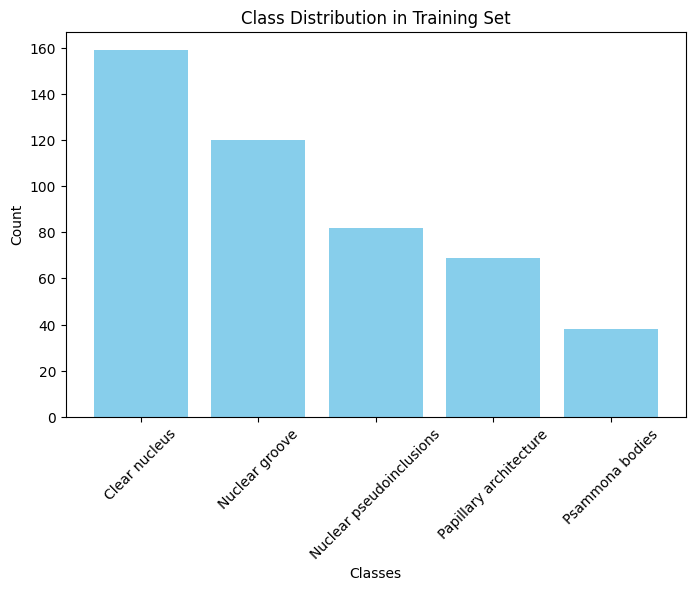

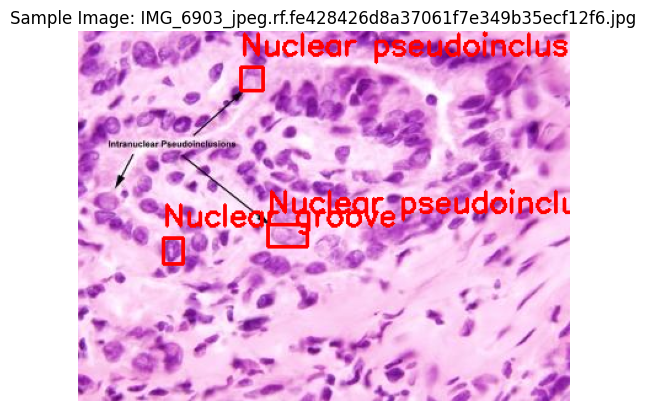

Corrupt Images: 0


In [6]:
import os
import yaml
import random
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Set Dataset2 base path (update with your Dataset2 path)
dataset2_path = "/kaggle/input/d/mgopich/dataset2-papillary/Classic_Papillary_Thyroid_Cancer.v1i.yolov9"
splits = ["train", "valid", "test"]

# 1.1 Basic Dataset Overview
for split in splits:
    image_dir = os.path.join(dataset2_path, split, "images")
    label_dir = os.path.join(dataset2_path, split, "labels")
    num_images = len([f for f in os.listdir(image_dir) if f.endswith(".jpg")])
    num_labels = len([f for f in os.listdir(label_dir) if f.endswith(".txt")])
    print(f"{split.upper()} SET:")
    print(f"  Images: {num_images}")
    print(f"  Labels: {num_labels}")
    print(f"  Missing labels: {num_images - num_labels}\n")

# 1.2 Label Distribution Analysis
yaml_path = os.path.join(dataset2_path, "data.yaml")
with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml["names"]

# Count occurrences in training set
class_counts = {i: 0 for i in range(len(class_names))}
train_label_dir = os.path.join(dataset2_path, "train", "labels")
for label_file in os.listdir(train_label_dir):
    with open(os.path.join(train_label_dir, label_file), "r") as f:
        for line in f.readlines():
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

plt.figure(figsize=(8,5))
plt.bar(class_names, list(class_counts.values()), color="skyblue")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.show()

# 1.3 Sample Image Visualization
def plot_sample_image(image_folder, label_folder):
    image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]
    random_image = random.choice(image_files)
    img_path = os.path.join(image_folder, random_image)
    label_path = os.path.join(label_folder, random_image.replace('.jpg', '.txt'))
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                xmin, ymin = int((x_center - width / 2) * w), int((y_center - height / 2) * h)
                xmax, ymax = int((x_center + width / 2) * w), int((y_center + height / 2) * h)
                cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
                cv2.putText(img, class_names[int(class_id)], (xmin, ymin - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample Image: {random_image}")
    plt.show()

plot_sample_image(os.path.join(dataset2_path, "train", "images"),
                  os.path.join(dataset2_path, "train", "labels"))

# 1.4 Check for Corrupt Images (in train set as an example)
def check_corrupt_images(image_folder):
    corrupted_files = []
    for file in os.listdir(image_folder):
        if file.endswith(".jpg"):
            img_path = os.path.join(image_folder, file)
            try:
                img = Image.open(img_path)
                img.verify()
            except Exception as e:
                corrupted_files.append(file)
    print(f"Corrupt Images: {len(corrupted_files)}")
    if corrupted_files:
        print(corrupted_files)

check_corrupt_images(os.path.join(dataset2_path, "train", "images"))


**Preprocessing**

This cell processes the raw Dataset2 for papillary thyroid cancer by performing the following steps:

1. Dataset Splitting:

    * The dataset is divided into three splits: train, valid, and test.


3. Image Preprocessing:
   
    * Each image is resized to 640x640 pixels and normalized to have pixel values in the range [0, 1].
    * The processed images are then saved in a new directory structure.


5. Label Preservation:

     *  Corresponding label files (in YOLO format) are copied unchanged from the raw dataset to the processed dataset.


7. Directory Structure:
 
     * The processed data is stored under data/processed/dataset2, mirroring the original splits.


In [7]:
import os
import cv2
from pathlib import Path
import shutil

# Set paths for Dataset2
raw_base = Path(dataset2_path)
processed_base = Path("data/processed/dataset2")  # Final processed dataset for Dataset2
splits = ["train", "valid", "test"]
TARGET_SIZE = (640, 640)

def preprocess_image(image_path, target_size=TARGET_SIZE):
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"Warning: Unable to read {image_path}")
        return None
    img = cv2.resize(img, target_size)
    img_norm = img.astype("float32") / 255.0
    return img_norm

for split in splits:
    raw_img_dir = raw_base / split / "images"
    raw_label_dir = raw_base / split / "labels"
    proc_img_dir = processed_base / split / "images"
    proc_label_dir = processed_base / split / "labels"
    proc_img_dir.mkdir(parents=True, exist_ok=True)
    proc_label_dir.mkdir(parents=True, exist_ok=True)
    
    for img_file in raw_img_dir.glob("*.jpg"):
        processed_img = preprocess_image(img_file)
        if processed_img is not None:
            output_path = proc_img_dir / img_file.name
            cv2.imwrite(str(output_path), (processed_img * 255).astype("uint8"))
    
    for label_file in raw_label_dir.glob("*.txt"):
        target_file = proc_label_dir / label_file.name
        shutil.copy(label_file, target_file)
    
    print(f"Preprocessing for {split} split of Dataset2 completed.")

print("All splits for Dataset2 have been preprocessed and saved to", processed_base)


Preprocessing for train split of Dataset2 completed.
Preprocessing for valid split of Dataset2 completed.
Preprocessing for test split of Dataset2 completed.
All splits for Dataset2 have been preprocessed and saved to data/processed/dataset2


**Training Data Augmentation**

This cell performs data augmentation on the training split of Dataset2. The main objectives of this process are:


1. Augmentation Pipeline:

    An augmentation pipeline is applied to each image using Albumentations. The pipeline includes:

* Horizontal flip
* Rotation (with a limit of 20°)
* Random brightness and contrast adjustment
* Gaussian blur
* Gaussian noise addition
* Bounding Box Handling:

    The code uses YOLO format bounding box annotations. Each bounding box is processed and then clipped to ensure all coordinate values remain within the [0.0, 1.0] range.


2. Directory Structure:

    * Augmented images and their corresponding labels are saved in a new directory structure (train_aug/images and train_aug/labels), separate from the original training data.


4. Output:
    * For every image in the training set:

The image is augmented.
Augmented image files are saved with a prefix aug_.
The corresponding label files (with updated bounding box coordinates) are written to the designated folder.


In [10]:
import cv2 
import os
import albumentations as A
from pathlib import Path

# Define the base directory for processed training data.
# Update the path with your processed_base directory.
processed_base = Path("/path/to/processed_base")

# Directories for processed training data
proc_train_img_dir = processed_base / "train" / "images"
proc_train_label_dir = processed_base / "train" / "labels"

# Directories for augmented training data
aug_train_img_dir = processed_base / "train_aug" / "images"
aug_train_label_dir = processed_base / "train_aug" / "labels"
aug_train_img_dir.mkdir(parents=True, exist_ok=True)
aug_train_label_dir.mkdir(parents=True, exist_ok=True)

# Augmentation pipeline (YOLO format)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
], bbox_params=A.BboxParams(format="yolo", label_fields=["category_ids"]))

def clip_bbox(bbox):
    """
    Clips each value in the bbox (YOLO format: x_center, y_center, width, height)
    to the range [0.0, 1.0].
    """
    return [max(0.0, min(val, 1.0)) for val in bbox]

def augment_image_and_labels(image_path, label_path, transform):
    image = cv2.imread(str(image_path))
    h, w, _ = image.shape
    bboxes = []
    category_ids = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, width, height = map(float, parts)
                    bboxes.append([x_center, y_center, width, height])
                    category_ids.append(int(class_id))
    transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
    aug_image = transformed["image"]
    aug_bboxes = transformed["bboxes"]
    aug_category_ids = transformed["category_ids"]
    # Clip bounding boxes to ensure values are within [0, 1]
    aug_bboxes = [clip_bbox(bbox) for bbox in aug_bboxes]
    return aug_image, aug_bboxes, aug_category_ids

# Process each image in the training images directory
for img_file in proc_train_img_dir.glob("*.jpg"):
    label_file = proc_train_label_dir / img_file.with_suffix(".txt").name
    aug_img, aug_bboxes, aug_cat_ids = augment_image_and_labels(img_file, label_file, transform)
    
    # Convert image to BGR for saving with cv2.imwrite
    aug_img_bgr = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
    output_img_path = aug_train_img_dir / f"aug_{img_file.name}"
    cv2.imwrite(str(output_img_path), aug_img_bgr)
    
    output_label_path = aug_train_label_dir / f"aug_{img_file.with_suffix('.txt').name}"
    with open(output_label_path, "w") as f:
        for cid, bbox in zip(aug_cat_ids, aug_bboxes):
            line = f"{cid} " + " ".join(f"{v:.6f}" for v in bbox) + "\n"
            f.write(line)

print("Augmentation for Dataset2 training split completed. Augmented data saved to", aug_train_img_dir)


Augmentation for Dataset2 training split completed. Augmented data saved to /path/to/processed_base/train_aug/images


**Export Processed Dataset for Download**


Once the dataset has been preprocessed and augmented, we need to compress it into a ZIP file for easy download. The following steps will:

1. Compress the dataset into a ZIP archive.

3. Generate a downloadable link so you can retrieve the processed dataset.


In [12]:
!ls /kaggle/working/data/processed/dataset2

test  train  train_aug	valid


In [13]:
# Zip the processed Dataset2 directory into a file named processed_dataset2.zip
!zip -r processed_dataset2.zip /kaggle/working/data/processed/dataset2

# Create a download link for the zipped file
from IPython.display import FileLink
FileLink(r'processed_dataset2.zip')


  adding: kaggle/working/data/processed/dataset2/ (stored 0%)
  adding: kaggle/working/data/processed/dataset2/test/ (stored 0%)
  adding: kaggle/working/data/processed/dataset2/test/labels/ (stored 0%)
  adding: kaggle/working/data/processed/dataset2/test/labels/IMG_6835_jpeg.rf.64cdbfdaf47326d62437e326f6a2ff57.txt (deflated 58%)
  adding: kaggle/working/data/processed/dataset2/test/labels/20231129_182321_jpeg.rf.749c4199b69cf8e462d80e243d0de6bb.txt (deflated 65%)
  adding: kaggle/working/data/processed/dataset2/test/labels/44525-svs-screenshot-1708479050324_png.rf.8fa025d394332ed7cbc5f62240c4f65b.txt (deflated 44%)
  adding: kaggle/working/data/processed/dataset2/test/labels/334506-svs-screenshot-1708477202947_png.rf.eae6d3be4a668e4664984fea9bea3691.txt (deflated 34%)
  adding: kaggle/working/data/processed/dataset2/test/labels/Capture5_JPG.rf.c7fb16448c10829c591a631987663190.txt (deflated 29%)
  adding: kaggle/working/data/processed/dataset2/test/labels/20231129_182509_jpeg.rf.370cf

/kaggle/working/processed_dataset2.zip